# MODELS

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
    classification_report,
    confusion_matrix,
    plot_confusion_matrix,
    plot_precision_recall_curve,
    plot_roc_curve,
)
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
from sklearn.preprocessing import MinMaxScaler
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import re
import preprocessor as pproc
from cleantext import clean
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import spacy

In [122]:
with open("serialized/data.pkl", "rb") as f:
    data = pickle.load(f)

## Original Dataset

In [3]:
tfidf_vectorizer = TfidfVectorizer()
X_or = tfidf_vectorizer.fit_transform(data['lemmatized'])
y_or = data["label"]
X_or.shape

(10547, 12804)

In [4]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_or, y_or, test_size=0.3, random_state=42, stratify=y_or)

In [5]:
# Multinomial Naive Bayes
mnb_o = MultinomialNB(alpha=0.01)
mnb_o.fit(X_train_o, y_train_o)
y_mnb_o = mnb_o.predict(X_test_o)
as_mnb_o = accuracy_score(y_test_o, y_mnb_o)
f1s_mnb_o = f1_score(y_test_o, y_mnb_o, average= "macro")
prec_mnb_o = precision_score(y_test_o, y_mnb_o)
rec_mnb_o = recall_score(y_test_o, y_mnb_o, average='macro')
print("\nMultinomial Naive Bayes - Original dataset\n")
#plot_confusion_matrix(mnb_o, X_test_o ,y_test_o, cmap= "Blues")
print(confusion_matrix(y_test_o,y_mnb_o))
print(classification_report(y_test_o,y_mnb_o))
print(accuracy_score(y_test_o, y_mnb_o))


Multinomial Naive Bayes - Original dataset

[[2662  144]
 [ 270   89]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2806
           1       0.38      0.25      0.30       359

    accuracy                           0.87      3165
   macro avg       0.64      0.60      0.61      3165
weighted avg       0.85      0.87      0.86      3165

0.8691943127962085


In [6]:
# Support Vector Machine
svc_o = SVC(verbose=10, random_state=42)
svc_o.fit(X_train_o, y_train_o)
y_svc_o = svc_o.predict(X_test_o)
as_svc_o = accuracy_score(y_test_o, y_svc_o)
f1s_svc_o = f1_score(y_test_o, y_svc_o, average="macro")
prec_svc_o = precision_score(y_test_o, y_svc_o)
rec_svc_o = recall_score(y_test_o, y_svc_o, average='macro')
print("\nSupport Vector Machine - Original dataset\n")
#plot_confusion_matrix(svc_o, X_test_o ,y_test_o, cmap="Blues")
print(confusion_matrix(y_test_o,y_svc_o))
print(classification_report(y_test_o,y_svc_o))
print(accuracy_score(y_test_o, y_svc_o))

[LibSVM]
Support Vector Machine - Original dataset

[[2806    0]
 [ 351    8]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2806
           1       1.00      0.02      0.04       359

    accuracy                           0.89      3165
   macro avg       0.94      0.51      0.49      3165
weighted avg       0.90      0.89      0.84      3165

0.8890995260663507


In [7]:
# Logistic
log_fit_o = LogisticRegression(random_state=42).fit(X_train_o, y_train_o)
y_log_o = log_fit_o.predict(X_test_o)
as_log_o = accuracy_score(y_test_o, y_log_o)
f1s_log_o = f1_score(y_test_o, y_log_o, average= "macro")
prec_log_o = precision_score(y_test_o, y_log_o)
rec_log_o = recall_score(y_test_o, y_log_o, average='macro')
print("\nLogistic Regression - Original dataset\n")
#plot_confusion_matrix(log_fit_o, X_test_o ,y_test_o, cmap="Blues")
print(confusion_matrix(y_test_o,y_log_o))
print(classification_report(y_test_o,y_log_o))
print(accuracy_score(y_test_o, y_log_o))


Logistic Regression - Original dataset

[[2803    3]
 [ 345   14]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2806
           1       0.82      0.04      0.07       359

    accuracy                           0.89      3165
   macro avg       0.86      0.52      0.51      3165
weighted avg       0.88      0.89      0.84      3165

0.8900473933649289


In [8]:
# Random Forest
rf_o = RandomForestClassifier(n_estimators=10, random_state=42)
rf_o.fit(X_train_o, y_train_o) 
y_rf_o = rf_o.predict(X_test_o)
as_rf_o = accuracy_score(y_test_o, y_rf_o)
f1s_rf_o = f1_score(y_test_o, y_rf_o, average= "macro")
prec_rf_o = precision_score(y_test_o, y_rf_o)
rec_rf_o = recall_score(y_test_o, y_rf_o, average='macro')
print("\nRandom Forest - Original dataset\n")
#plot_confusion_matrix(rf_o, X_test_o,y_test_o, cmap="Blues")
print(confusion_matrix(y_test_o,y_rf_o))
print(classification_report(y_test_o,y_rf_o))
print(accuracy_score(y_test_o, y_rf_o))


Random Forest - Original dataset

[[2787   19]
 [ 325   34]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2806
           1       0.64      0.09      0.17       359

    accuracy                           0.89      3165
   macro avg       0.77      0.54      0.55      3165
weighted avg       0.87      0.89      0.85      3165

0.8913112164296998


In [9]:
# Decision Tree
tree_o = DecisionTreeClassifier(random_state=42)
tree_o.fit(X_train_o, y_train_o)
y_tree_o = tree_o.predict(X_test_o)
as_tree_o = accuracy_score(y_test_o, y_tree_o)
f1s_tree_o = f1_score(y_test_o, y_tree_o, average= "macro")
prec_tree_o = precision_score(y_test_o, y_tree_o)
rec_tree_o = recall_score(y_test_o, y_tree_o, average='macro')
print("\nDecision Tree - Original dataset\n")
#plot_confusion_matrix(tree_o, X_test_o,y_test_o, cmap="Blues")
print(confusion_matrix(y_test_o, y_tree_o))
print(classification_report(y_test_o, y_tree_o))
print(accuracy_score(y_test_o, y_tree_o))


Decision Tree - Original dataset

[[2619  187]
 [ 223  136]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2806
           1       0.42      0.38      0.40       359

    accuracy                           0.87      3165
   macro avg       0.67      0.66      0.66      3165
weighted avg       0.86      0.87      0.87      3165

0.8704581358609794


In [10]:
s1 = pd.Series([as_mnb_o, as_svc_o, as_log_o, as_rf_o, as_tree_o], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s2 = pd.Series([f1s_mnb_o, f1s_svc_o, f1s_log_o, f1s_rf_o, f1s_tree_o], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s3 = pd.Series([prec_mnb_o, prec_svc_o, prec_log_o, prec_rf_o, prec_tree_o], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s4 = pd.Series([rec_mnb_o, rec_svc_o, rec_log_o, rec_rf_o, rec_tree_o], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
d = {'Accuracy Score' : s1, 'Precision Score': s3, 'Recall Score' : s4, 'F1 Score' : s2 }
dfm = pd.DataFrame(d)
print("\nOriginal dataset\n")
dfm.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'tomato', axis = 0)


Original dataset



,Accuracy Score,Precision Score,Recall Score,F1 Score
Multinomial Naive Bayes,0.869194,0.381974,0.598296,0.614263
Support Vector Machine,0.889100,1.000000,0.511142,0.492367
Logistic Regression,0.890047,0.823529,0.518964,0.508010
Random Forest,0.891311,0.641509,0.543968,0.553460
Decision Tree,0.870458,0.421053,0.656094,0.663117


## Balanced Dataset

In [135]:
X_bal = tfidf_vectorizer.fit_transform(data['lemmatized'])
y_bal = data["label"]

In [136]:
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)

In [137]:
X_under, y_under = undersample.fit_resample(X_bal, y_bal)
print(Counter(y_under))

Counter({0: 1196, 1: 1196})


In [138]:
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_under, y_under, test_size=0.3, random_state=42, stratify=y_under)


Multinomoial Naive Bayes - Balanced dataset

              precision    recall  f1-score   support

           0       0.74      0.61      0.67       359
           1       0.67      0.78      0.72       359

    accuracy                           0.70       718
   macro avg       0.70      0.70      0.70       718
weighted avg       0.70      0.70      0.70       718

0.6977715877437326


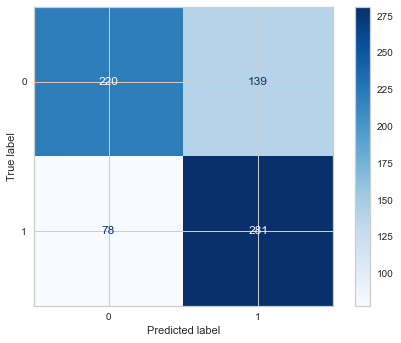

In [139]:
# Multinomial Naive Bayes
mnb_i = MultinomialNB(alpha=0.01)
mnb_i.fit(X_train_i, y_train_i)
y_mnb_i = mnb_i.predict(X_test_i)
as_mnb_i = accuracy_score(y_test_i, y_mnb_i)
f1s_mnb_i = f1_score(y_test_i, y_mnb_i, average= "macro")
prec_mnb_i = precision_score(y_test_i, y_mnb_i)
rec_mnb_i = recall_score(y_test_i, y_mnb_i, average='macro')
print("\nMultinomoial Naive Bayes - Balanced dataset\n")
plot_confusion_matrix(mnb_i, X_test_i,y_test_i, cmap = "Blues")
#print(confusion_matrix(y_test_i,y_mnb_i))
print(classification_report(y_test_i, y_mnb_i))
print(accuracy_score(y_test_i, y_mnb_i))

[LibSVM]
Support Vector Machine - Balanced dataset

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       359
           1       0.79      0.67      0.73       359

    accuracy                           0.75       718
   macro avg       0.75      0.75      0.75       718
weighted avg       0.75      0.75      0.75       718

0.7465181058495822


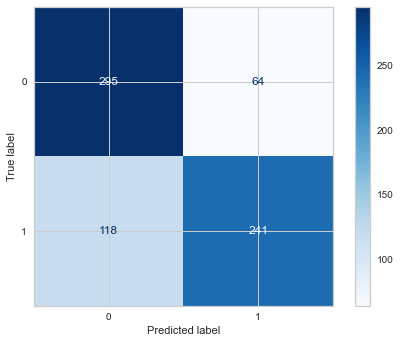

In [140]:
# Support Vector Machine
svc_i = SVC(verbose=10, random_state=42)
svc_i.fit(X_train_i, y_train_i)
y_svc_i = svc_i.predict(X_test_i)
as_svc_i = accuracy_score(y_test_i, y_svc_i)
f1s_svc_i = f1_score(y_test_i, y_svc_i, average="macro")
prec_svc_i = precision_score(y_test_i, y_svc_i)
rec_svc_i = recall_score(y_test_i, y_svc_i, average='macro')
print("\nSupport Vector Machine - Balanced dataset\n")
plot_confusion_matrix(svc_i, X_test_i, y_test_i, cmap="Blues")
#print(confusion_matrix(y_test_i, y_svc_i))
print(classification_report(y_test_i, y_svc_i))
print(accuracy_score(y_test_i, y_svc_i))


Logistic Regression - Balanced dataset

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       359
           1       0.77      0.68      0.72       359

    accuracy                           0.74       718
   macro avg       0.74      0.74      0.74       718
weighted avg       0.74      0.74      0.74       718

0.7409470752089137


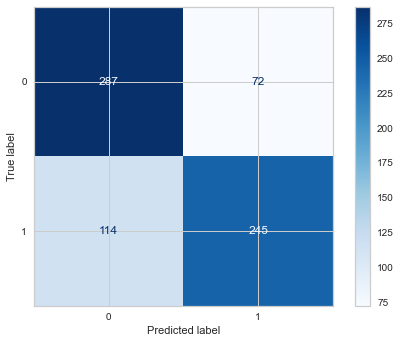

In [141]:
# Logistic
log_fit_i = LogisticRegression(random_state=42).fit(X_train_i, y_train_i)
y_log_i = log_fit_i.predict(X_test_i)
as_log_i = accuracy_score(y_test_i, y_log_i)
f1s_log_i = f1_score(y_test_i, y_log_i, average= "macro")
prec_log_i = precision_score(y_test_i, y_log_i)
rec_log_i = recall_score(y_test_i, y_log_i, average='macro')
print("\nLogistic Regression - Balanced dataset\n")
plot_confusion_matrix(log_fit_i, X_test_i, y_test_i, cmap="Blues")
#print(confusion_matrix(y_test_i, y_log_i))
print(classification_report(y_test_i, y_log_i))
print(accuracy_score(y_test_i, y_log_i))


Random Forest - Balanced dataset

              precision    recall  f1-score   support

           0       0.62      0.86      0.72       359
           1       0.77      0.47      0.58       359

    accuracy                           0.66       718
   macro avg       0.69      0.66      0.65       718
weighted avg       0.69      0.66      0.65       718

0.6629526462395543


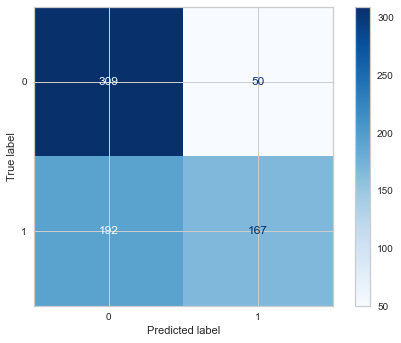

In [142]:
# Random Forest
rf_i = RandomForestClassifier(n_estimators=10, random_state=42)
rf_i.fit(X_train_i, y_train_i) 
y_rf_i = rf_i.predict(X_test_i)
as_rf_i = accuracy_score(y_test_i, y_rf_i)
f1s_rf_i = f1_score(y_test_i, y_rf_i, average= "macro")
prec_rf_i = precision_score(y_test_i, y_rf_i)
rec_rf_i = recall_score(y_test_i, y_rf_i, average='macro')
print("\nRandom Forest - Balanced dataset\n")
plot_confusion_matrix(rf_i, X_test_i, y_test_i, cmap="Blues")
#print(confusion_matrix(y_test_i, y_rf_i))
print(classification_report(y_test_i, y_rf_i))
print(accuracy_score(y_test_i, y_rf_i))


Decision Tree - Balanced dataset

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       359
           1       0.72      0.64      0.68       359

    accuracy                           0.69       718
   macro avg       0.70      0.69      0.69       718
weighted avg       0.70      0.69      0.69       718

0.6935933147632312


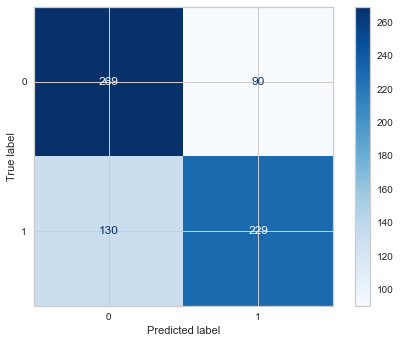

In [143]:
# Decision Tree
tree_i = DecisionTreeClassifier(random_state=42)
tree_i.fit(X_train_i, y_train_i)
y_tree_i = tree_i.predict(X_test_i)
as_tree_i = accuracy_score(y_test_i, y_tree_i)
f1s_tree_i = f1_score(y_test_i, y_tree_i, average= "macro")
prec_tree_i = precision_score(y_test_i, y_tree_i)
rec_tree_i = recall_score(y_test_i, y_tree_i, average='macro')
print("\nDecision Tree - Balanced dataset\n")
plot_confusion_matrix(tree_i, X_test_i, y_test_i, cmap="Blues")
#print(confusion_matrix(y_test_i, y_tree_i))
print(classification_report(y_test_i, y_tree_i))
print(accuracy_score(y_test_i, y_tree_i))

In [144]:
s1_i = pd.Series([as_mnb_i, as_svc_i, as_log_i, as_rf_i, as_tree_i], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s2_i = pd.Series([f1s_mnb_i, f1s_svc_i, f1s_log_i, f1s_rf_i, f1s_tree_i], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s3_i = pd.Series([prec_mnb_i, prec_svc_i, prec_log_i, prec_rf_i, prec_tree_i], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s4_i = pd.Series([rec_mnb_i, rec_svc_i, rec_log_i, rec_rf_i, rec_tree_i], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
d_i = {'Accuracy Score' : s1_i, 'Precision Score': s3_i, 'Recall Score' : s4_i, 'F1 Score' : s2_i}
dfm_i = pd.DataFrame(d_i)
print("\nBalanced dataset\n")
dfm_i.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'tomato', axis = 0)


Balanced dataset



,Accuracy Score,Precision Score,Recall Score,F1 Score
Multinomial Naive Bayes,0.697772,0.669048,0.697772,0.695574
Support Vector Machine,0.746518,0.790164,0.746518,0.745076
Logistic Regression,0.740947,0.772871,0.740947,0.740058
Random Forest,0.662953,0.769585,0.662953,0.649233
Decision Tree,0.693593,0.717868,0.693593,0.692639


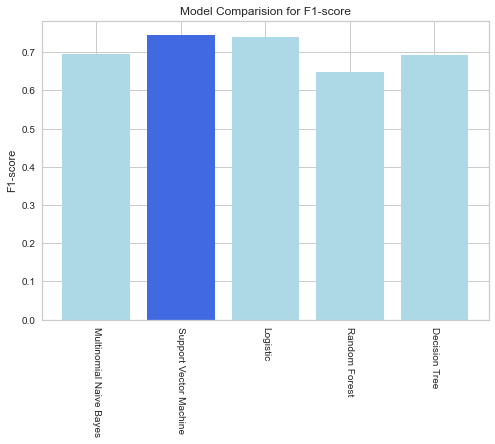

In [145]:
objects = ('Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic', 'Random Forest', 'Decision Tree')
y_pos = np.arange(len(objects))
performance_f1 = [f1s_mnb_i, f1s_svc_i, f1s_log_i, f1s_rf_i, f1s_tree_i]
clrs = ['lightblue' if (x < max(performance_f1)) else 'royalblue' for x in performance_f1 ]
plt.bar(y_pos, performance_f1, align='center', alpha=1, color=clrs)
plt.xticks(y_pos, objects, rotation=270)
plt.ylabel('F1-score')
plt.title('Model Comparision for F1-score')
plt.show()

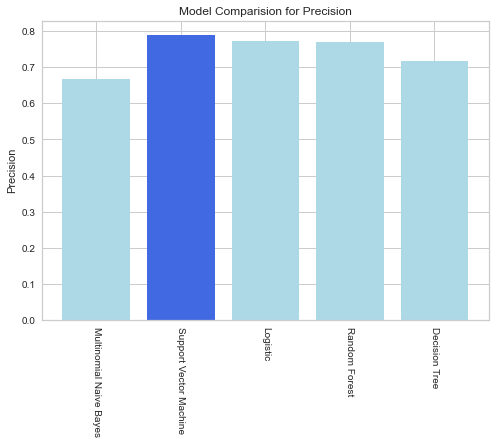

In [146]:
performance_prec = [prec_mnb_i, prec_svc_i, prec_log_i, prec_rf_i, prec_tree_i]
clrs = ['lightblue' if (x < max(performance_prec)) else 'royalblue' for x in performance_prec ]
plt.bar(y_pos, performance_prec, align='center', alpha=1, color=clrs)
plt.xticks(y_pos, objects, rotation=270)
plt.ylabel('Precision')
plt.title('Model Comparision for Precision')
plt.show()

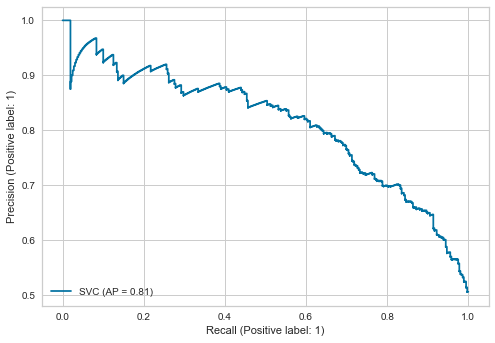

In [147]:
plot_precision_recall_curve(svc_i, X_test_i, y_test_i)

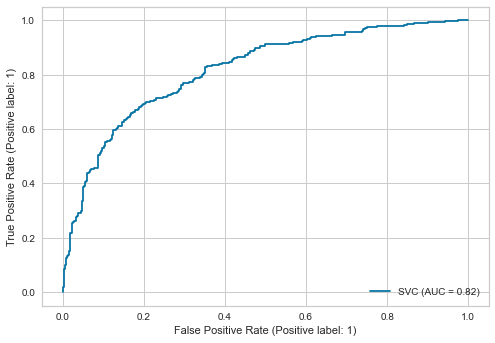

In [148]:
plot_roc_curve(svc_i,  X_test_i, y_test_i)

In [149]:
with open("serialized/vect.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

with open("serialized/svc.pkl", "wb") as f:
    pickle.dump(svc_i, f)

### Models on POS

## Nouns + Proper Nouns + Adjectives + Adverbs

In [25]:
def filter_text_pos(x):
    final_pos_text = []
    for elem in x:
        for pos in pos_list:
            if elem[1] == pos:
                final_pos_text.append(elem[0])
    
    return " ".join(final_pos_text)

In [26]:
pos_list = ["NOUN" , "PROPN" ,"ADJ" ]

In [27]:
data["NOUN_PROPN_ADJ"] = data.apply(lambda x: filter_text_pos(x["POS_spacy"]), axis=1)

In [28]:
X_Propn = tfidf_vectorizer.fit_transform(data["NOUN_PROPN_ADJ"])
y_Propn = data["label"]

In [29]:
X_over_p, y_over_p = undersample.fit_resample(X_Propn, y_Propn)

In [30]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_over_p, y_over_p, test_size=0.3, random_state=42, stratify=y_over_p)


Multinomoial Naive Bayes - NOUN_PROPN_ADJ

              precision    recall  f1-score   support

           0       0.73      0.68      0.70       359
           1       0.70      0.75      0.72       359

    accuracy                           0.71       718
   macro avg       0.71      0.71      0.71       718
weighted avg       0.71      0.71      0.71       718

0.713091922005571


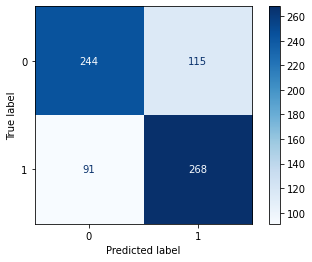

In [31]:
# Multinomial Naive Bayes
mnb_p = MultinomialNB(alpha=0.01)
mnb_p.fit(X_train_p, y_train_p)
y_mnb_p = mnb_p.predict(X_test_p)
as_mnb_p = accuracy_score(y_test_p, y_mnb_p)
f1s_mnb_p = f1_score(y_test_p, y_mnb_p, average= "macro")
prec_mnb_p = precision_score(y_test_p, y_mnb_p)
rec_mnb_p = recall_score(y_test_p, y_mnb_p, average='macro')
print("\nMultinomoial Naive Bayes - NOUN_PROPN_ADJ\n")
plot_confusion_matrix(mnb_p, X_test_p, y_test_p, cmap="Blues")
#print(confusion_matrix(y_test_p, y_mnb_p))
print(classification_report(y_test_p, y_mnb_p))
print(accuracy_score(y_test_p, y_mnb_p))

[LibSVM]
Support Vector Machine - NOUN_PROPN_ADJ

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       359
           1       0.76      0.67      0.71       359

    accuracy                           0.73       718
   macro avg       0.73      0.73      0.73       718
weighted avg       0.73      0.73      0.73       718

0.7311977715877437


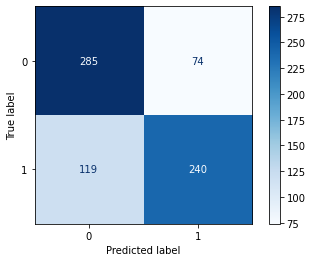

In [32]:
# Support Vector Machine
svc_p = SVC(verbose=10, random_state=42)
svc_p.fit(X_train_p, y_train_p)
y_svc_p = svc_p.predict(X_test_p)
as_svc_p = accuracy_score(y_test_p, y_svc_p)
f1s_svc_p = f1_score(y_test_p, y_svc_p, average="macro")
prec_svc_p = precision_score(y_test_p, y_svc_p)
rec_svc_p = recall_score(y_test_p, y_svc_p, average='macro')
print("\nSupport Vector Machine - NOUN_PROPN_ADJ\n")
plot_confusion_matrix(svc_p, X_test_p, y_test_p, cmap="Blues")
#print(confusion_matrix(y_test_p, y_svc_p))
print(classification_report(y_test_p, y_svc_p))
print(accuracy_score(y_test_p, y_svc_p))


Logistic Regression - NOUN_PROPN_ADJ

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       359
           1       0.76      0.65      0.70       359

    accuracy                           0.72       718
   macro avg       0.73      0.72      0.72       718
weighted avg       0.73      0.72      0.72       718

0.7228412256267409


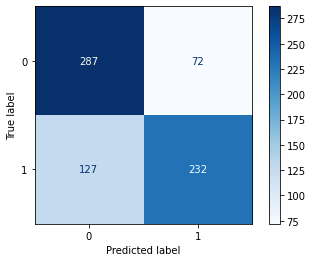

In [33]:
# Logistic
log_fit_p = LogisticRegression(random_state=42).fit(X_train_p, y_train_p)
y_log_p = log_fit_p.predict(X_test_p)
as_log_p = accuracy_score(y_test_p, y_log_p)
f1s_log_p = f1_score(y_test_p, y_log_p, average= "macro")
prec_log_p = precision_score(y_test_p, y_log_p)
rec_log_p = recall_score(y_test_p, y_log_p, average='macro')
print("\nLogistic Regression - NOUN_PROPN_ADJ\n")
plot_confusion_matrix(log_fit_p, X_test_p, y_test_p, cmap="Blues")
#print(confusion_matrix(y_test_p, y_log_p))
print(classification_report(y_test_p, y_log_p))
print(accuracy_score(y_test_p, y_log_p))


Random Forest - NOUN_PROPN_ADJ

              precision    recall  f1-score   support

           0       0.63      0.84      0.72       359
           1       0.76      0.52      0.61       359

    accuracy                           0.68       718
   macro avg       0.70      0.68      0.67       718
weighted avg       0.70      0.68      0.67       718

0.6754874651810585


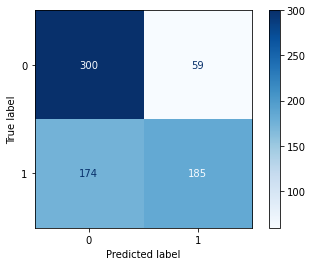

In [34]:
# Random Forest
rf_p = RandomForestClassifier(n_estimators=10, random_state=42)
rf_p.fit(X_train_p, y_train_p) 
y_rf_p = rf_p.predict(X_test_p)
as_rf_p = accuracy_score(y_test_p, y_rf_p)
f1s_rf_p = f1_score(y_test_p, y_rf_p, average= "macro")
prec_rf_p = precision_score(y_test_p, y_rf_p)
rec_rf_p = recall_score(y_test_p, y_rf_p, average='macro')
print("\nRandom Forest - NOUN_PROPN_ADJ\n")
plot_confusion_matrix(rf_p, X_test_p, y_test_p, cmap="Blues")
#print(confusion_matrix(y_test_p, y_rf_p))
print(classification_report(y_test_p, y_rf_p))
print(accuracy_score(y_test_p, y_rf_p))


Decision Tree - NOUN_PROPN_ADJ

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       359
           1       0.72      0.59      0.65       359

    accuracy                           0.68       718
   macro avg       0.69      0.68      0.68       718
weighted avg       0.69      0.68      0.68       718

0.6796657381615598


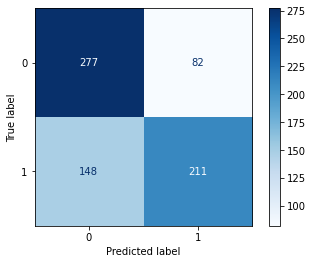

In [35]:
# Decision Tree
tree_p = DecisionTreeClassifier(random_state=42)
tree_p.fit(X_train_p, y_train_p)
y_tree_p = tree_p.predict(X_test_p)
as_tree_p = accuracy_score(y_test_p, y_tree_p)
f1s_tree_p = f1_score(y_test_p, y_tree_p, average= "macro")
prec_tree_p = precision_score(y_test_p, y_tree_p)
rec_tree_p = recall_score(y_test_p, y_tree_p, average='macro')
print("\nDecision Tree - NOUN_PROPN_ADJ\n")
plot_confusion_matrix(tree_p, X_test_p, y_test_p, cmap="Blues")
#print(confusion_matrix(y_test_p, y_tree_p))
print(classification_report(y_test_p, y_tree_p))
print(accuracy_score(y_test_p, y_tree_p))

In [36]:
s1_p = pd.Series([as_mnb_p, as_svc_p, as_log_p, as_rf_p, as_tree_p], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s2_p = pd.Series([f1s_mnb_p, f1s_svc_p, f1s_log_p, f1s_rf_p,  f1s_tree_p], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s3_p = pd.Series([prec_mnb_p, prec_svc_p, prec_log_p, prec_rf_p, prec_tree_p], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s4_p = pd.Series([rec_mnb_p, rec_svc_p, rec_log_p, rec_rf_p, rec_tree_p], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
d_p = {'Accuracy Score' : s1_p, 'Precision Score': s3_p, 'Recall Score' : s4_p, 'F1 Score' : s2_p}
dfm_p = pd.DataFrame(d_p)
print("\nNOUN_PROPN_ADJ\n")
dfm_p.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'tomato', axis = 0)


NOUN_PROPN_ADJ



,Accuracy Score,Precision Score,Recall Score,F1 Score
Multinomial Naive Bayes,0.713092,0.699739,0.713092,0.712771
Support Vector Machine,0.731198,0.764331,0.731198,0.730138
Logistic Regression,0.722841,0.763158,0.722841,0.721205
Random Forest,0.675487,0.758197,0.675487,0.666943
Decision Tree,0.679666,0.720137,0.679666,0.676936


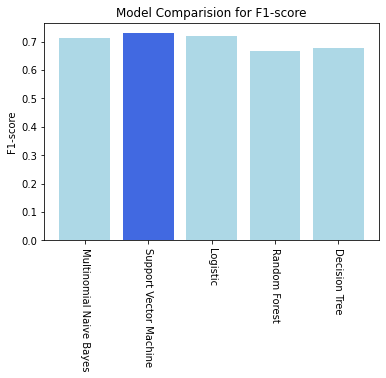

In [37]:
objects = ('Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic', 'Random Forest', 'Decision Tree')
y_pos = np.arange(len(objects))
performance_f1 = [f1s_mnb_p, f1s_svc_p, f1s_log_p, f1s_rf_p, f1s_tree_p]
clrs = ['lightblue' if (x < max(performance_f1)) else 'royalblue' for x in performance_f1 ]
plt.bar(y_pos, performance_f1, align='center',  color=clrs)
plt.xticks(y_pos, objects, rotation=270)
plt.ylabel('F1-score')
plt.title('Model Comparision for F1-score')
plt.show()

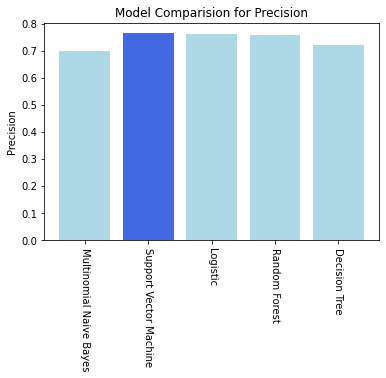

In [38]:
performance_prec = [prec_mnb_p, prec_svc_p, prec_log_p, prec_rf_p, prec_tree_p]
clrs = ['lightblue' if (x < max(performance_prec)) else 'royalblue' for x in performance_prec ]
plt.bar(y_pos, performance_prec, align='center', alpha=1, color=clrs)
plt.xticks(y_pos, objects, rotation=270)
plt.ylabel('Precision')
plt.title('Model Comparision for Precision')
plt.show()

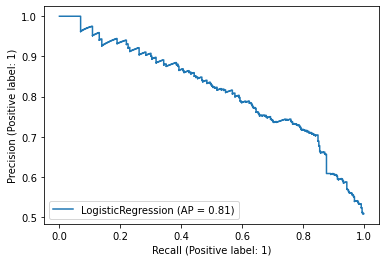

In [39]:
plot_precision_recall_curve(log_fit_p, X_test_p, y_test_p)

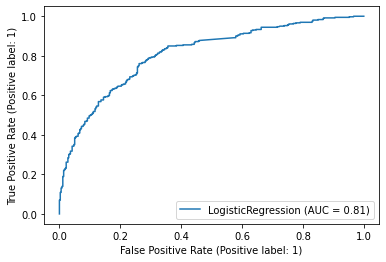

In [40]:
plot_roc_curve(log_fit_p,  X_test_p, y_test_p)

## Nouns + Proper Nouns + Verbs + Adjectives + Adverbs

In [41]:
pos_list = ["NOUN","PROPN", "VERB", "ADJ", "ADV", "ADP", "DET" ]
data["NOUN_PROPN_VERB_ADJ_ADV_ADP_DET"] = data.apply(lambda x: filter_text_pos(x["POS_spacy"]), axis=1)

In [42]:
X_NounPropnVerb = tfidf_vectorizer.fit_transform(data["NOUN_PROPN_VERB_ADJ_ADV_ADP_DET"])
y_NounPropnVerb = data["label"]

In [43]:
X_over_n, y_over_n = undersample.fit_resample(X_NounPropnVerb, y_NounPropnVerb)

In [44]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_over_n, y_over_n, test_size=0.3, random_state=42, stratify=y_over_n)


Multinomoial Naive Bayes - NOUN_PROPN_VERB_ADJ_ADV_DET

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       359
           1       0.67      0.74      0.71       359

    accuracy                           0.69       718
   macro avg       0.69      0.69      0.69       718
weighted avg       0.69      0.69      0.69       718

0.6908077994428969


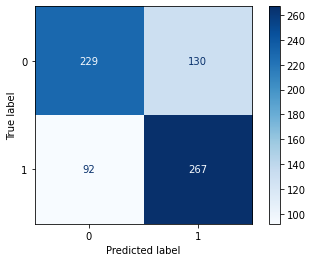

In [45]:
# Multinomial Naive Bayes
mnb_n = MultinomialNB(alpha=0.01)
mnb_n.fit(X_train_n, y_train_n)
y_mnb_n = mnb_n.predict(X_test_n)
as_mnb_n = accuracy_score(y_test_n, y_mnb_n)
f1s_mnb_n = f1_score(y_test_n, y_mnb_n, average= "macro")
prec_mnb_n = precision_score(y_test_n, y_mnb_n)
rec_mnb_n = recall_score(y_test_n, y_mnb_n, average='macro')
print("\nMultinomoial Naive Bayes - NOUN_PROPN_VERB_ADJ_ADV_DET\n")
plot_confusion_matrix(mnb_n, X_test_n, y_test_n, cmap="Blues")
#print(confusion_matrix(y_test_n, y_mnb_n))
print(classification_report(y_test_n, y_mnb_n))
print(accuracy_score(y_test_n, y_mnb_n))

[LibSVM]
Support Vector Machine - NOUN_PROPN_VERB_ADJ_ADV_DET

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       359
           1       0.73      0.68      0.70       359

    accuracy                           0.71       718
   macro avg       0.71      0.71      0.71       718
weighted avg       0.71      0.71      0.71       718

0.713091922005571


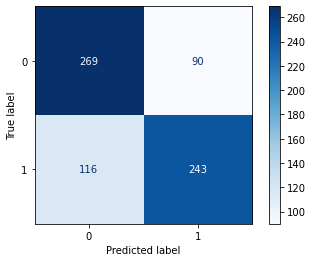

In [46]:
# Support Vector Machine
svc_n = SVC(verbose=10, random_state=42)
svc_n.fit(X_train_n, y_train_n)
y_svc_n = svc_n.predict(X_test_n)
as_svc_n = accuracy_score(y_test_n, y_svc_n)
f1s_svc_n = f1_score(y_test_n, y_svc_n, average="macro")
prec_svc_n = precision_score(y_test_n, y_svc_n)
rec_svc_n = recall_score(y_test_n, y_svc_n, average='macro')
print("\nSupport Vector Machine - NOUN_PROPN_VERB_ADJ_ADV_DET\n")
plot_confusion_matrix(svc_n, X_test_n, y_test_n, cmap="Blues")
#print(confusion_matrix(y_test_n, y_svc_n)
print(classification_report(y_test_n, y_svc_n))
print(accuracy_score(y_test_n, y_svc_n))


Logistic Regression - NOUN_PROPN_VERB_ADJ_ADV_DET

              precision    recall  f1-score   support

           0       0.70      0.75      0.73       359
           1       0.73      0.68      0.70       359

    accuracy                           0.72       718
   macro avg       0.72      0.72      0.72       718
weighted avg       0.72      0.72      0.72       718

0.7158774373259053


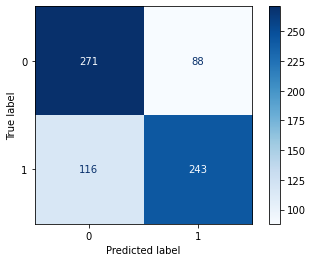

In [47]:
# Logistic
log_fit_n = LogisticRegression(random_state=42).fit(X_train_n, y_train_n)
y_log_n = log_fit_n.predict(X_test_n)
as_log_n = accuracy_score(y_test_n, y_log_n)
f1s_log_n = f1_score(y_test_n, y_log_n, average= "macro")
prec_log_n = precision_score(y_test_n, y_log_n)
rec_log_n = recall_score(y_test_n, y_log_n, average='macro')
print("\nLogistic Regression - NOUN_PROPN_VERB_ADJ_ADV_DET\n")
plot_confusion_matrix(log_fit_n, X_test_n, y_test_n, cmap="Blues")
#print(confusion_matrix(y_test_n, y_log_n))
print(classification_report(y_test_n, y_log_n))
print(accuracy_score(y_test_n, y_log_n))


Random Forest - NOUN_PROPN_VERB_ADJ_ADV_DET

              precision    recall  f1-score   support

           0       0.63      0.84      0.72       359
           1       0.76      0.50      0.60       359

    accuracy                           0.67       718
   macro avg       0.69      0.67      0.66       718
weighted avg       0.69      0.67      0.66       718

0.66991643454039


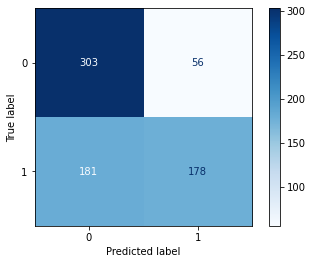

In [48]:
# Random Forest
rf_n = RandomForestClassifier(n_estimators=10, random_state=42)
rf_n.fit(X_train_n, y_train_n) 
y_rf_n = rf_n.predict(X_test_n)
as_rf_n = accuracy_score(y_test_n, y_rf_n)
f1s_rf_n = f1_score(y_test_n, y_rf_n, average= "macro")
prec_rf_n = precision_score(y_test_n, y_rf_n)
rec_rf_n = recall_score(y_test_n, y_rf_n, average='macro')
print("\nRandom Forest - NOUN_PROPN_VERB_ADJ_ADV_DET\n")
plot_confusion_matrix(rf_n, X_test_n, y_test_n, cmap="Blues")
#print(confusion_matrix(y_test_n, y_rf_n))
print(classification_report(y_test_n, y_rf_n))
print(accuracy_score(y_test_n, y_rf_n))


Decision Tree - NOUN_PROPN_VERB_ADJ_ADV_DET

              precision    recall  f1-score   support

           0       0.64      0.67      0.65       359
           1       0.65      0.62      0.63       359

    accuracy                           0.64       718
   macro avg       0.64      0.64      0.64       718
weighted avg       0.64      0.64      0.64       718

0.6420612813370473


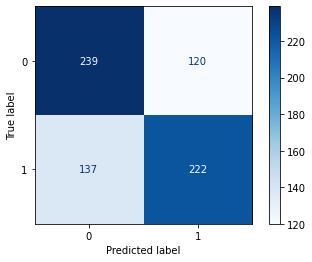

In [49]:
# Decision Tree
tree_n = DecisionTreeClassifier(random_state=42)
tree_n.fit(X_train_n, y_train_n)
y_tree_n = tree_n.predict(X_test_n)
as_tree_n = accuracy_score(y_test_n, y_tree_n)
f1s_tree_n = f1_score(y_test_n, y_tree_n, average= "macro")
prec_tree_n = precision_score(y_test_n, y_tree_n)
rec_tree_n = recall_score(y_test_n, y_tree_n, average='macro')
print("\nDecision Tree - NOUN_PROPN_VERB_ADJ_ADV_DET\n")
plot_confusion_matrix(tree_n, X_test_n, y_test_n, cmap="Blues")
#print(confusion_matrix(y_test_n, y_tree_n))
print(classification_report(y_test_n, y_tree_n))
print(accuracy_score(y_test_n, y_tree_n))

In [50]:
s1_n = pd.Series([as_mnb_n, as_svc_n, as_log_n, as_rf_n, as_tree_n], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s2_n = pd.Series([f1s_mnb_n, f1s_svc_n, f1s_log_n, f1s_rf_n, f1s_tree_n], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s3_n = pd.Series([prec_mnb_n, prec_svc_n, prec_log_n, prec_rf_n, prec_tree_n], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s4_n = pd.Series([rec_mnb_n, rec_svc_n, rec_log_n, rec_rf_n, rec_tree_n,], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
d_n = {'Accuracy Score' : s1_n, 'Precision Score': s3_n, 'Recall Score' : s4_n, 'F1 Score' : s2_n}
dfm_n = pd.DataFrame(d_n)
print("\nNOUN_PROPN_VERB_ADJ_ADV_DET\n")
dfm_n.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'tomato', axis = 0)


NOUN_PROPN_VERB_ADJ_ADV_DET



,Accuracy Score,Precision Score,Recall Score,F1 Score
Multinomial Naive Bayes,0.690808,0.672544,0.690808,0.689939
Support Vector Machine,0.713092,0.729730,0.713092,0.712715
Logistic Regression,0.715877,0.734139,0.715877,0.715445
Random Forest,0.669916,0.760684,0.669916,0.659599
Decision Tree,0.642061,0.649123,0.642061,0.641861


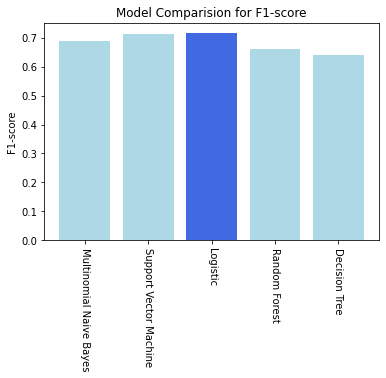

In [51]:
objects = ('Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic', 'Random Forest', 'Decision Tree')
y_pos = np.arange(len(objects))
performance = [f1s_mnb_n, f1s_svc_n, f1s_log_n, f1s_rf_n, f1s_tree_n]
clrs = ['lightblue' if (x < max(performance)) else 'royalblue' for x in performance ]
plt.bar(y_pos, performance, align='center', alpha=1, color=clrs)
plt.xticks(y_pos, objects, rotation=270)
plt.ylabel('F1-score')
plt.title('Model Comparision for F1-score')
plt.show()

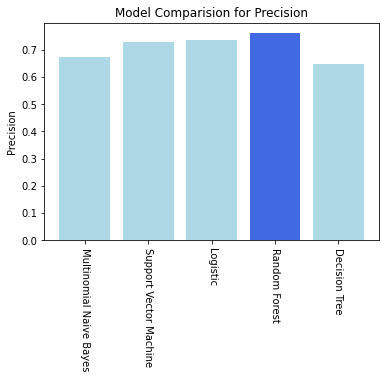

In [52]:
performance_prec = [prec_mnb_n, prec_svc_n, prec_log_n, prec_rf_n, prec_tree_n]
clrs = ['lightblue' if (x < max(performance_prec)) else 'royalblue' for x in performance_prec ]
plt.bar(y_pos, performance_prec, align='center', alpha=1, color=clrs)
plt.xticks(y_pos, objects, rotation=270)
plt.ylabel('Precision')
plt.title('Model Comparision for Precision')
plt.show()

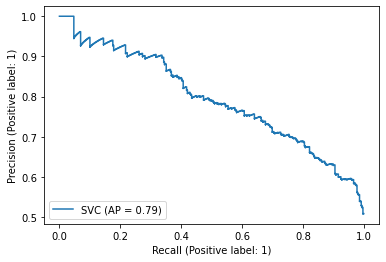

In [53]:
plot_precision_recall_curve(svc_n, X_test_n, y_test_n)

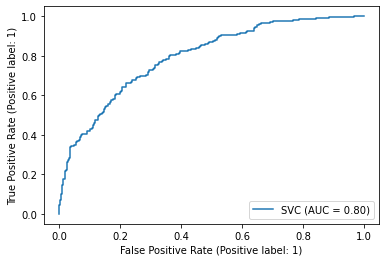

In [54]:
plot_roc_curve(svc_n,  X_test_n, y_test_n)

## Polarity as Feature

In [55]:
sentiment_analyzer = VS()
def sentiment_analysis(tweet):   
    sentiment = sentiment_analyzer.polarity_scores(tweet)    
    features = [sentiment['neu'], sentiment['neg']]
    return features

In [56]:
def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

In [57]:
final_features = sentiment_analysis_array(data["text_clean"])

In [58]:
scaler = MinMaxScaler()
final_features_scaled = scaler.fit_transform(final_features)

In [59]:
tfidf_npvaad = tfidf_vectorizer.fit_transform(data["text_clean"])
tfidf_a = tfidf_npvaad.toarray()
modelling_features = np.concatenate([tfidf_a,final_features_scaled],axis=1)
modelling_features.shape

(10547, 14986)

In [60]:
X_fe = pd.DataFrame(modelling_features)
y_fe = data["label"]
X_f, y_f = undersample.fit_resample(X_fe, y_fe)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, random_state=42, test_size=0.2)


Multinomoial Naive Bayes - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity

              precision    recall  f1-score   support

           0       0.72      0.63      0.67       236
           1       0.68      0.77      0.72       243

    accuracy                           0.70       479
   macro avg       0.70      0.70      0.70       479
weighted avg       0.70      0.70      0.70       479

0.697286012526096


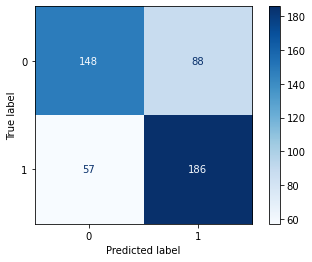

In [61]:
# Multinomial Naive Bayes
mnb_f = MultinomialNB(alpha=0.01)
mnb_f.fit(X_train_f, y_train_f)
y_mnb_f = mnb_f.predict(X_test_f)
as_mnb_f = accuracy_score(y_test_f, y_mnb_f)
f1s_mnb_f = f1_score(y_test_f, y_mnb_f, average= "macro")
prec_mnb_f = precision_score(y_test_f, y_mnb_f)
rec_mnb_f = recall_score(y_test_f, y_mnb_f, average='macro')
print("\nMultinomoial Naive Bayes - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity\n")
plot_confusion_matrix(mnb_f, X_test_f,y_test_f, cmap="Blues")
#print(confusion_matrix(y_test_f,y_mnb_f))
print(classification_report(y_test_f,y_mnb_f))
print(accuracy_score(y_test_f, y_mnb_f))

[LibSVM]
Support Vector Machine - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity

              precision    recall  f1-score   support

           0       0.70      0.73      0.71       236
           1       0.73      0.70      0.71       243

    accuracy                           0.71       479
   macro avg       0.71      0.71      0.71       479
weighted avg       0.71      0.71      0.71       479

0.7118997912317327


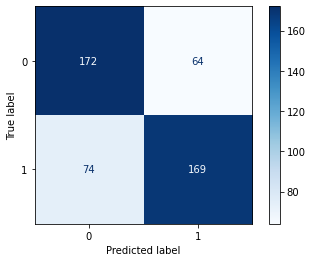

In [62]:
# Support Vector Machine
svc_f = SVC(verbose=10, random_state=42)
svc_f.fit(X_train_f, y_train_f)
y_svc_f = svc_f.predict(X_test_f)
as_svc_f = accuracy_score(y_test_f, y_svc_f)
f1s_svc_f = f1_score(y_test_f, y_svc_f, average="macro")
prec_svc_f = precision_score(y_test_f, y_svc_f)
rec_svc_f = recall_score(y_test_f, y_svc_f, average='macro')
print("\nSupport Vector Machine - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity\n")
plot_confusion_matrix(svc_f, X_test_f,y_test_f, cmap="Blues")
#print(confusion_matrix(y_test_f,y_svc_f)
print(classification_report(y_test_f,y_svc_f))
print(accuracy_score(y_test_f, y_svc_f))


Logistic Regression - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       236
           1       0.72      0.71      0.72       243

    accuracy                           0.72       479
   macro avg       0.72      0.72      0.72       479
weighted avg       0.72      0.72      0.72       479

0.7160751565762005


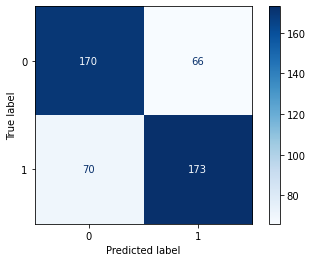

In [63]:
# Logistic
log_fit_f = LogisticRegression(random_state=42).fit(X_train_f, y_train_f)
y_log_f = log_fit_f.predict(X_test_f)
as_log_f = accuracy_score(y_test_f, y_log_f)
f1s_log_f = f1_score(y_test_f, y_log_f, average= "macro")
prec_log_f = precision_score(y_test_f, y_log_f)
rec_log_f = recall_score(y_test_f, y_log_f, average='macro')
print("\nLogistic Regression - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity\n")
plot_confusion_matrix(log_fit_f, X_test_f,y_test_f, cmap="Blues")
#print(confusion_matrix(y_test_f,y_log_f))
print(classification_report(y_test_f,y_log_f))
print(accuracy_score(y_test_f, y_log_f))


Random Forest - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity

              precision    recall  f1-score   support

           0       0.65      0.83      0.73       236
           1       0.77      0.56      0.65       243

    accuracy                           0.69       479
   macro avg       0.71      0.70      0.69       479
weighted avg       0.71      0.69      0.69       479

0.6931106471816284


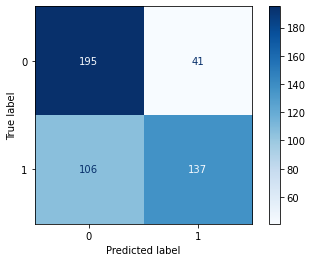

In [64]:
# Random Forest
rf_f = RandomForestClassifier(n_estimators=10, random_state=42)
rf_f.fit(X_train_f, y_train_f) 
y_rf_f = rf_f.predict(X_test_f)
as_rf_f = accuracy_score(y_test_f, y_rf_f)
f1s_rf_f = f1_score(y_test_f, y_rf_f, average= "macro")
prec_rf_f = precision_score(y_test_f,y_rf_f)
rec_rf_f = recall_score(y_test_f, y_rf_f, average='macro')
print("\nRandom Forest - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity\n")
plot_confusion_matrix(rf_f, X_test_f ,y_test_f, cmap="Blues")
#print(confusion_matrix(y_test_f,y_rf_f))
print(classification_report(y_test_f ,y_rf_f))
print(accuracy_score(y_test_f, y_rf_f))


Decision Tree - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       236
           1       0.69      0.71      0.70       243

    accuracy                           0.69       479
   macro avg       0.69      0.69      0.69       479
weighted avg       0.69      0.69      0.69       479

0.6889352818371608


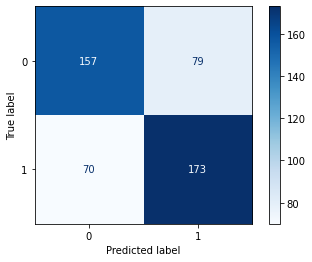

In [65]:
# Decision Tree
tree_f = DecisionTreeClassifier(random_state=42)
tree_f.fit(X_train_f, y_train_f)
y_tree_f = tree_f.predict(X_test_f)
as_tree_f = accuracy_score(y_test_f, y_tree_f)
f1s_tree_f = f1_score(y_test_f, y_tree_f, average= "macro")
prec_tree_f = precision_score(y_test_f, y_tree_f)
rec_tree_f = recall_score(y_test_f, y_tree_f, average='macro')
print("\nDecision Tree - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity\n")
plot_confusion_matrix(tree_f, X_test_f, y_test_f, cmap="Blues")
#print(confusion_matrix(y_test_f,y_tree_f))
print(classification_report(y_test_f,y_tree_f))
print(accuracy_score(y_test_f, y_tree_f))

In [66]:
s1_f = pd.Series([as_mnb_f, as_svc_f, as_log_f, as_rf_f, as_tree_f], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s2_f = pd.Series([f1s_mnb_f, f1s_svc_f, f1s_log_f, f1s_rf_f,  f1s_tree_f], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s3_f = pd.Series([prec_mnb_f, prec_svc_f, prec_log_f, prec_rf_f, prec_tree_f], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s4_f = pd.Series([rec_mnb_f, rec_svc_f, rec_log_f, rec_rf_f, rec_tree_f], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
d_f = {'Accuracy Score' : s1_f, 'Precision Score': s3_f, 'Recall Score' : s4_f, 'F1 Score' : s2_f}
dfm_f = pd.DataFrame(d_f)
print("\nNOUN_PROPN_VERB_ADJ_ADV_DET with Polarity\n")
dfm_f.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'tomato', axis = 0)


NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity



,Accuracy Score,Precision Score,Recall Score,F1 Score
Multinomial Naive Bayes,0.697286,0.678832,0.696275,0.695369
Support Vector Machine,0.711900,0.725322,0.712143,0.711888
Logistic Regression,0.716075,0.723849,0.716137,0.716064
Random Forest,0.693111,0.769663,0.695029,0.688544
Decision Tree,0.688935,0.686508,0.688594,0.688588


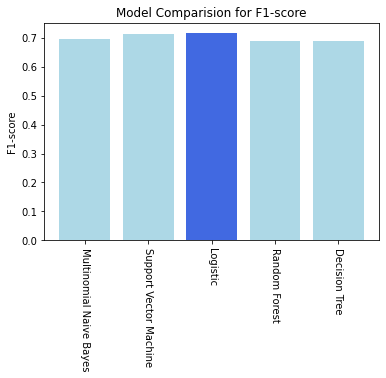

In [67]:
objects = ('Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic', 'Random Forest', 'Decision Tree')
y_pos = np.arange(len(objects))
performance_f1 = [f1s_mnb_f, f1s_svc_f, f1s_log_f, f1s_rf_f, f1s_tree_f]
clrs = ['lightblue' if (x < max(performance_f1)) else 'royalblue' for x in performance_f1 ]
plt.bar(y_pos, performance_f1, align='center', alpha=1, color=clrs)
plt.xticks(y_pos, objects, rotation=270)
plt.ylabel('F1-score')
plt.title('Model Comparision for F1-score')
plt.show()

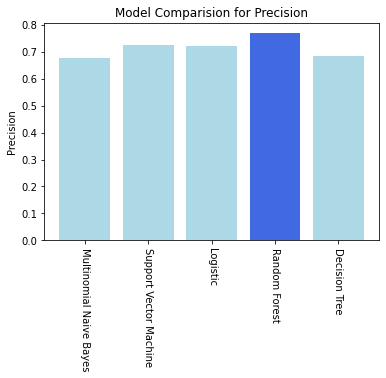

In [68]:
performance_prec = [prec_mnb_f, prec_svc_f, prec_log_f, prec_rf_f, prec_tree_f]
clrs = ['lightblue' if (x < max(performance_prec)) else 'royalblue' for x in performance_prec ]
plt.bar(y_pos, performance_prec, align='center', alpha=1, color=clrs)
plt.xticks(y_pos, objects, rotation=270)
plt.ylabel('Precision')
plt.title('Model Comparision for Precision')
plt.show()

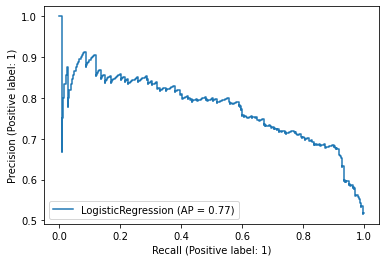

In [69]:
plot_precision_recall_curve(log_fit_f, X_test_f, y_test_f)

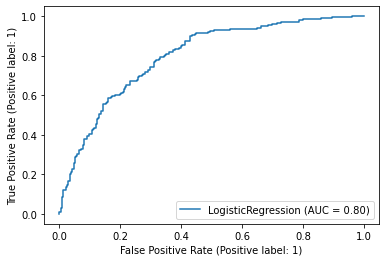

In [70]:
plot_roc_curve(log_fit_f,  X_test_f, y_test_f)

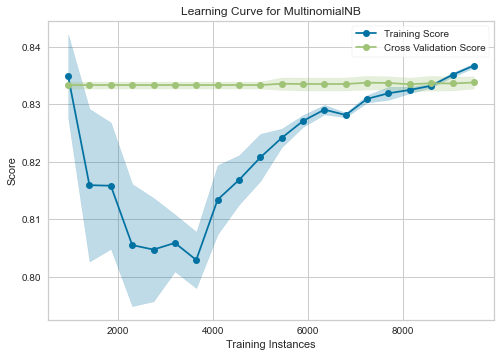

<AxesSubplot:title={'center':'Learning Curve for MultinomialNB'}, xlabel='Training Instances', ylabel='Score'>

In [71]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.datasets import load_game
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.1, 1, 20 )

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_or, y_or)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

KeyboardInterrupt: 

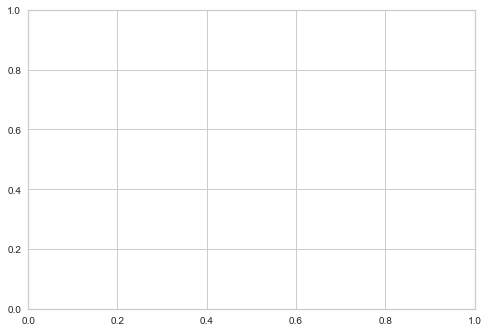

In [134]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.datasets import load_game
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.1, 1, 20 )

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_under, y_under)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [73]:
pos_list = ["NOUN","ADJ"]
data["NOUN_ADJ"] = data.apply(lambda x: filter_text_pos(x["POS_spacy"]), axis=1)

In [74]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=2, random_state=42)
X_class = tfidf_vectorizer.fit_transform(data["NOUN_ADJ"])
lda.fit(X_class)
for i, topic in enumerate(lda.components_):
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])

['times', 'new', 'race', 'many', 'message', 'way', 'great', 'kids', 'years', 'school']
['old', 'day', 'blacks', 'year', 'time', 'black', 'whites', 'good', 'people', 'white']


In [75]:
document_topics_lda = lda.transform(X_class)
document_topics_lda.shape

(10547, 2)

In [76]:
topic_terms = lda.components_
top_terms = 10
topic_keyterms = []
for i, topic in enumerate(lda.components_):
    topic_keyterms.append([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
topics = [', '.join(topic) for topic in topic_keyterms]
topics_df = pd.DataFrame(topics, columns=['Term per Topic'], index=['Topic'+str(t) for t in range(1,2+1)])

dt_df = pd.DataFrame(document_topics_lda, columns=['T'+str(i) for i in range(1,2+1)])
pd.options.display.float_format='{:,.5f}'.format
pd.set_option('display.max_colwidth',200)
max_contrib_topics = dt_df.max(axis=0)
dominant_topics = max_contrib_topics.index
contrib_perc = max_contrib_topics.values
document_numbers = [dt_df[dt_df[t]==max_contrib_topics.loc[t]].index[0] for t in dominant_topics]
results_df = pd.DataFrame({'Dominant Topic': dominant_topics, 'Contribution%': contrib_perc, 'Documents': document_numbers, 'Topic': topics_df['Term per Topic']})
results_df

,Dominant Topic,Contribution%,Documents,Topic
Topic1,T1,0.89174,823,"times, new, race, many, message, way, great, kids, years, school"
Topic2,T2,0.88192,9570,"old, day, blacks, year, time, black, whites, good, people, white"


# HATE SPEECH CLASSIFICATION

In [111]:
import pandas as pd
import numpy as np
import glob
import os
from tqdm.notebook import tqdm
import ntpath
import matplotlib.pyplot as plt
import nltk
import nltk.sentiment.vader as vd
import string
import re
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import download
from langdetect import detect
import spacy
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
    classification_report,
    confusion_matrix,
    plot_confusion_matrix,
    plot_precision_recall_curve,
    plot_roc_curve,
)
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import preprocessor as pproc
from cleantext import clean

In [112]:
def expand_contractions(text):
    cList = {
        "n't": " not",
        "/TD": " ",
        " PM ": " personal message ",
        " pm ": " personal message ",
        "PM ": "personal message ",
        " Donot ": " do not ",
        " MB ": " megabytes ",
    }
    
    c_re = re.compile("(%s)" % "|".join(cList.keys()))

    return c_re.sub(lambda match: cList[match.group(0)], text)

In [113]:
def full_text_clean(text):
    aa = expand_contractions(text)
    
    bb = pproc.clean(
        clean(pproc.clean(aa),
              fix_unicode=True,               # fix various unicode errors
              to_ascii=True,                  # transliterate to closest ASCII representation
              lower=True,                     # lowercase text
              no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
              no_urls=True,                  # replace all URLs with a special token
              no_emails=True,                # replace all email addresses with a special token
              no_phone_numbers=False,         # replace all phone numbers with a special token
              no_numbers=False,               # replace all numbers with a special token
              no_digits=False,                # replace all digits with a special token
              no_currency_symbols=False,      # replace all currency symbols with a special token
              no_punct=True,                 # remove punctuations
              replace_with_url=" ",
              replace_with_email=" ",
        )
    )
    
    swords = set().union(stopwords.words("english"), string.punctuation)

    cc = (
        bb.lower()
        .replace(r"(@[a-z0-9]+)\w+", " ")
        .replace(r"http\S+", " ")
        .replace(r"www\S+", " ")
        .replace(r"com/watch", " ")
        .replace(r"\S*[.,:;!?-]\S*[^\s\.,:;!?-]", " ")
        .replace(r" th ", " ")
        .replace(r"\w*\d\w*", " ")
        .replace(r"rlm", " ")
        .replace(r"pttm", " ")
        .replace(r"ghlight", " ")
        .replace(r"[0-9]+(?:st| st|nd| nd|rd| rd|th| th)", " ")
        .replace(r"([^a-z \t])", " ")
        .replace(r" +", " ")
        )
    
    cc = " ".join([i for i in cc.split() if not i in swords])
    
    return cc

In [118]:
def hate_predict(X, vect, clf):
    lista_pulita = [full_text_clean(text) for text in X]
    X_new = vect.transform(lista_pulita)
    classification = clf.predict(X_new)
    return classification

In [119]:
lista = 'I hate you'
hate_predict([lista], tfidf_vectorizer, svc_i)

ValueError: X.shape[1] = 1 should be equal to 12804, the number of features at training time